## Challenge Exercise 5 (CE5)

### Due on 10/29/25 @ 11:55 pm EST (see Canvas Assignment)

****

## Collaboration policy

This is a group assignment. **The maximum number of students per group is three**. There are no existing group assignments. However, **all group members must be different from those in CE4** (i.e., there is no overlap with the previous group). Please be welcoming and kind, and invite students you may not know well (i.e., be a good classmate). 

If you have any questions about what is or isn't allowed, **you must ask**. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.

In the markdown cell below, put the full name of each person in your group.

### Team members

1. Audrey Salmon
2. Connor Lee

****
## AI policy

AI may not be used to generate a coding solution. Your solution must be your own work. If you have any questions about what is or isn't allowed, you must ask. Saying afterwards that you didn't understand or were unsure is not an acceptable excuse.




****
## Honor pledge

To acknowledge and understand the **Collaboration and AI policies** outlined above, each team member must enter their Onyen and PID in this markdown cell.

1. asalmon 730576571
2. connogle 730556651

****

## Python modules

All the Python modules needed to complete this CE are provided to you. 

<span style="background-color: #FFFF00">**No other modules are authorized** and **if other modules are added points will be deducted**.</span>

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from scipy.optimize import minimize
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

****

### Identifying security vulnerabilities in malware assembly code.

This Kaggle <a href="https://www.kaggle.com/datasets/muhammad4hmed/malwaremicrosoftbig">dataset</a> is from the Microsoft Malware BIG 2015 Challenge that attempts to predict different malware vulnerabilities in programs that use the x86 assembly (ASM) instructions. Like you learned in COMP 311, an ASM instruction performs a hardware operation. For example, the CLI instruction performs a `clear interrupt flag` hardware operation (see x86 ASM <a href="https://www.felixcloutier.com/x86/">instruction</a> reference). 

The dataset contains 69 columns. Specifically, for columns representing ASM instructions (such as `push`, `pop`, `jmp`, `mov`), the value indicates the number of times that instruction appears in the malware program. The `line_count` column shows the total number of ASM instructions in the program, while the `size_bytes` column indicates the total size of the program in bytes. 

Table 1 (page 2) in this <a href="https://arxiv.org/pdf/1802.10135">document</a> defines the different types of malware vulnerabilities. Specifically, there are nine malware classes, where `1` is `Ramnit` and `9` is `Gatak`. The `class` column specifies this information.

Tips:
- This numpy <a href="https://numpy.org/doc/stable/user/absolute_beginners.html">tutorial</a> may be helpful.
- This dataframe <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">selecting, slicing, and extracting tutorial</a> may be helpful.
- This datafame <a href="https://www.geeksforgeeks.org/python/filter-pandas-dataframe-with-multiple-conditions/">conditional filtering tutorial</a> maybe be helpful.
- The data visualization notebook (see Canvas schedule, 8/21) may be helpful.
- The data representation slides (see Canvas schedule) may be helpful.
- The performance evaluation slides (see Canvas schedule) may be helpful.
- The introduction to supervised learning slides (see Canvas schedule) may be helpful.
- The regression slides (see Canvas schedule) may be helpful.
- The classification slides (see Canvas schedule) may be helpful.

****

In [159]:
df = pd.read_csv("data.csv")
df

,add,call,cdq,cld,cli,cmc,cmp,cwd,daa,dd,...,sti,stos,sub,test,wait,xchg,xor,line_count,size_bytes,class
0,436,646.0,0.0,10.0,9.0,0.0,228.0,0.0,56.0,89930,...,1.0,0.0,892.0,53.0,10.0,0.0,162.0,118529,6874624,2
1,469,262.0,0.0,4.0,1.0,4.0,185.0,4.0,20.0,3464,...,3.0,7.0,846.0,8.0,0.0,9.0,19.0,7937,460288,8
2,1587,1828.0,0.0,0.0,31.0,0.0,689.0,0.0,904.0,24833,...,1.0,0.0,4005.0,680.0,44.0,0.0,418.0,90625,5256192,9
3,213,227.0,0.0,0.0,3.0,0.0,127.0,0.0,132.0,71979,...,0.0,0.0,437.0,78.0,0.0,0.0,199.0,83201,4825600,9
4,36,76.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,112,...,2.0,3.0,82.0,16.0,0.0,0.0,18.0,12289,712704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,235,98.0,36.0,26.0,0.0,22.0,155.0,28.0,56.0,1768,...,33.0,37.0,368.0,36.0,9.0,67.0,64.0,8449,489984,4
10864,60,43.0,0.0,0.0,9.0,0.0,1.0,0.0,39.0,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10753,623616,4
10865,277,151.0,1.0,8.0,11.0,1.0,58.0,2.0,128.0,6319,...,0.0,18.0,463.0,30.0,16.0,34.0,73.0,40193,2331136,4
10866,101,45.0,0.0,16.0,1.0,0.0,31.0,16.0,3.0,708,...,0.0,1.0,111.0,13.0,0.0,36.0,38.0,15105,876032,4


****

**P1** (10 Points): Data Preprocessing and Visualization.

<img src="p1.png" width="600" style="float: right"/>

Create a combined scatter plot that visualizes the relationships between the `Lolipop` and `Gatak` malware programs using these ASM instructions.
- `MOV` and `JMP`, 
- `PUSH` and `POP`.

The ASM instruction data must be normalized in $[0,1]$. To achieve this, you may use the Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScalar</a> (see authorized Python modules above).

Additionally, the class label for `Lolipop` data is replaced with `1`, and the class label for `Gatak` data is replaced with `-1`.

To receive full credit, your new dataframe must generate scatter plots identical to the ones provided.

You may assume:
- All the data (in your new dataframe) is used to generate these scatter plots.
- The colors used to generate plots are blue (Lolipop) and red (Gatak).
- The plot figure size is 10 inches in width and 5 inches in height.
- The plot figure uses a tight layout.
- The default x-axis, y-axis, and z-axis tick values are used.
- The scatter plot marker size is 50.
- The alpha (opacity) value is 0.25.



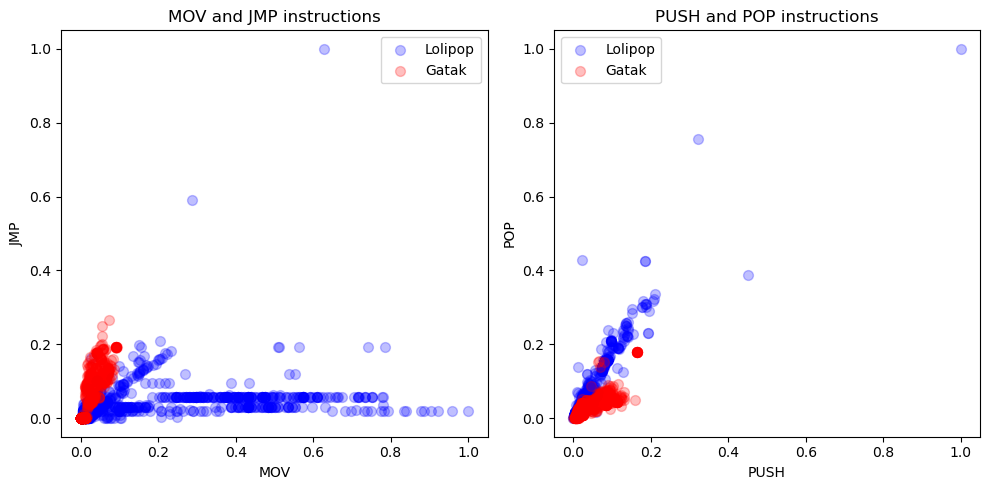

In [160]:
# --------------------------------------
# Add your P1 coding solution below.
# --------------------------------------

new_df = df[(df['class'] == 2) | (df['class'] == 9)].copy()
new_df['class'] = new_df['class'].replace({2: 1, 9: -1})

scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df[['mov', 'jmp', 'push', 'pop']].values)

scaled_df = pd.DataFrame(scaled, columns=['mov', 'jmp', 'push', 'pop'])
scaled_df['class'] = new_df['class'].values


figure, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(scaled_df.loc[scaled_df['class'] == 1, 'mov'],
            scaled_df.loc[scaled_df['class'] == 1, 'jmp'],
            color='blue', s=50, alpha=0.25, label='Lolipop')
axes[0].scatter(scaled_df.loc[scaled_df['class'] == -1, 'mov'],
            scaled_df.loc[scaled_df['class'] == -1, 'jmp'],
            color='red', s=50, alpha=0.25, label='Gatak')
axes[0].set_xlabel('MOV')
axes[0].set_ylabel('JMP')
axes[0].set_title('MOV and JMP instructions')
axes[0].legend()

axes[1].scatter(scaled_df.loc[scaled_df['class'] == 1, 'push'],
            scaled_df.loc[scaled_df['class'] == 1, 'pop'],
            color='blue', s=50, alpha=0.25, label='Lolipop')
axes[1].scatter(scaled_df.loc[scaled_df['class'] == -1, 'push'],
            scaled_df.loc[scaled_df['class'] == -1, 'pop'],
            color='red', s=50, alpha=0.25, label='Gatak')
axes[1].set_xlabel('PUSH')
axes[1].set_ylabel('POP')
axes[1].set_title('PUSH and POP instructions')
axes[1].legend()

plt.tight_layout()
plt.show()









****

<img src="p2.png" width="500" style="float: right"/>

**P2** (10 Points): Support vector machine (SVM) classification model comparison.

Using the new dataframe, this question will construct, evaluate, and compare two soft-margin L2 hinge-loss SVM classification models to predict the label (Lolipop or Gatak) based on the number of `MOV` and `JMP` instructions in the malware program. Specifically, 
- A handwritten classification model as specified in the 10/9 slides (see Canvas). Gradient descent will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).
- A Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a> model.

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets at a 90/10 split. Specifically, 90% of the data will be used to train, and 10% will be reserved for testing. You can write your own solution or use the Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function (see authorized Python modules above).

The accuracy (ACC) measure for both the training and test datasets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate plots similar to the reference plots. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided</span>.

You may assume:
- Only the training data is used to generate the scatter plot.
- The plot figure size is 10 inches in width and 5 inches in height.
- The plot figure uses a tight layout.
- The colors used to generate plots are blue (Lolipop), red (Gatak), green (decision boundary), and dashed-green (+/-1 margins).
- The plot line weight (lw) is 0.2.
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($C$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The plot grid is enabled.
- The method parameter used in the minimize function is L-BFGS-B.


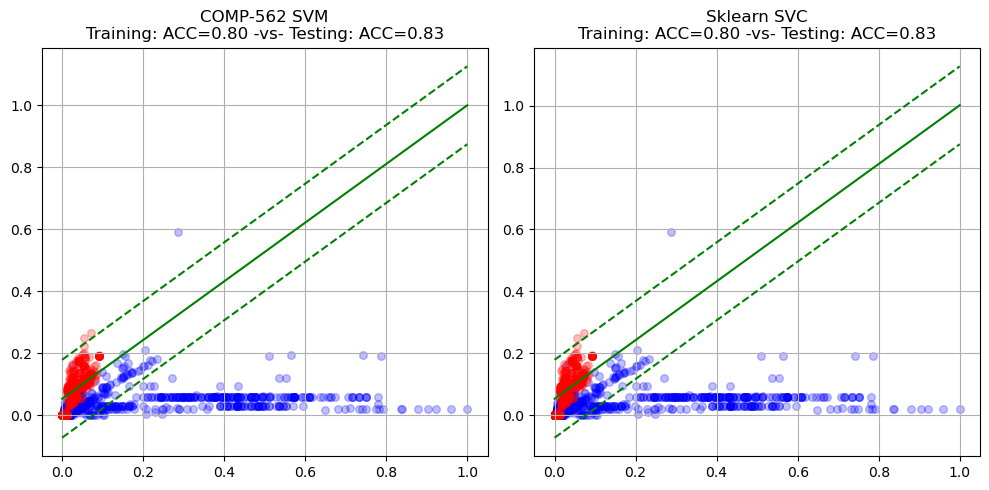

In [161]:
# --------------------------------------
# Add your P2 coding solution below.
# --------------------------------------


scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df[['mov', 'jmp']].values)

scaled_df = pd.DataFrame(scaled, columns=['mov', 'jmp'])
scaled_df['class'] = new_df['class'].values

x = scaled_df[['mov', 'jmp']].values
y = scaled_df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

C = 0.5

# COMP-562 Gradient Descent SVC

def obj_func(theta, x, y):
    w = theta[:-1]
    b = theta[-1]

    slack_vars = np.maximum(0, 1 - y * (np.dot(x, w) + b))
    return 0.5 * np.dot(w, w) + C * np.sum(slack_vars ** 2)

def grad(theta, x, y):
    w = theta[:-1]
    b = theta[-1]
    slack = 1 - y * (np.dot(x, w) + b)
    active = slack > 0
    
    w_grad = w - 2 * C * (np.dot((y[active] * slack[active]), x[active]))
    b_grad = 0 - 2 * C * np.sum(y[active] * slack[active])
    return np.append(w_grad, b_grad)

guess = np.zeros(3)
result = minimize(obj_func, guess, args=(x_train, y_train), method='L-BFGS-B', jac=grad)

theta = result.x
w = theta[:-1]
b = theta[-1]

y_train_pred_gd = np.sign(np.dot(x_train, w) + b)
y_test_pred_gd = np.sign(np.dot(x_test, w) + b)

train_acc_gd = acc(y_train, y_train_pred_gd)
test_acc_gd = acc(y_test, y_test_pred_gd)


# SKLearn LinearSVC

clf = LinearSVC(C = C, max_iter=10000)
clf.fit(x_train, y_train)
y_train_pred_skl = clf.predict(x_train)
y_test_pred_skl = clf.predict(x_test)
train_acc_skl = acc(y_train, y_train_pred_skl)
test_acc_skl = acc(y_test, y_test_pred_skl)


# Plot!

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def plot_svm(axis, w, b, title):
    axis.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='blue', s=30, alpha=0.25, label='Lolipop')
    axis.scatter(x_train[y_train==-1, 0], x_train[y_train==-1, 1], color='red', s=30, alpha=0.25, label='Gatak')

    x_vals = np.linspace(x_train[:,0].min(), x_train[:,0].max(), 200)
    y_vals = (-w[0] * x_vals - b) / w[1]
    margin_pos = (-w[0] * x_vals - b + 1) / w[1]
    margin_neg = (-w[0] * x_vals - b - 1) / w[1]

    axis.plot(x_vals, y_vals, color='green')
    axis.plot(x_vals, margin_pos, color='green', linestyle='--')
    axis.plot(x_vals, margin_neg, color='green', linestyle='--')

    axis.set_title(title)
    axis.grid(True)

plot_svm(axes[0], w, b, f"COMP-562 SVM\nTraining: ACC={train_acc_gd:.2f} -vs- Testing: ACC={test_acc_gd:.2f}")

w_skl = clf.coef_[0]
b_skl = clf.intercept_[0]
plot_svm(axes[1], w_skl, b_skl, f"Sklearn SVC\nTraining: ACC={train_acc_skl:.2f} -vs- Testing: ACC={test_acc_skl:.2f}")

plt.tight_layout()
plt.show()

****

<img src="p3.png" width="500" style="float: right"/>

**P3** (10 Points): Support vector machine (SVM) classification model comparison.

Using the new dataframe, this question will construct, evaluate, and compare two soft-margin L2 hinge-loss SVM classification models to predict the label (Lolipop or Gatak) based on the number of `PUSH` and `POP` instructions in the malware program. Specifically, 
- A handwritten classification model as specified in the 10/9 slides (see Canvas). Gradient descent will be used to estimate the optimal parameters. You can write your own iterative solution or use the SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html">minimize</a> function (see authorized Python modules above).
- A Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html">LinearSVC</a> model (see authorized Python modules above).

Before model construction and evaluation, the data will be randomly shuffled and then partitioned into two sets at a 90/10 split. Specifically, 90% of the data will be used to train, and 10% will be reserved for testing. You can write your own solution or use the Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">train_test_split</a> function (see authorized Python modules above).

The accuracy (ACC) measure for both the training and test datasets is reported in the plot title. These may be calculated using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html">accuracy_score</a> function (see authorized Python modules above).

To receive full credit, your solution must generate plots similar to the reference plots. <span style="background-color: #FFFF00">**Note**: because the data is randomly shuffled each time the cell is run, your plot and measures will be slightly different than those provided</span>.

You may assume:
- Only the training data is used to generate the scatter plot.
- The plot figure size is 10 inches in width and 5 inches in height.
- The plot figure uses a tight layout.
- The colors used to generate plots are blue (Lolipop), red (Gatak), green (decision boundary), and dashed-green (+/-1 margins).
- The plot line weight (lw) is 0.2.
- The default x-axis, y-axis, and z-axis tick values are used.
- You choose the free parameters (e.g., learning rate ($\alpha$), regularization ($C$), iterations ($N$)).
- The scatter plot marker size is 30.
- The alpha (opacity) value is 0.25.
- The plot grid is enabled.
- The method parameter used in the minimize function is L-BFGS-B.


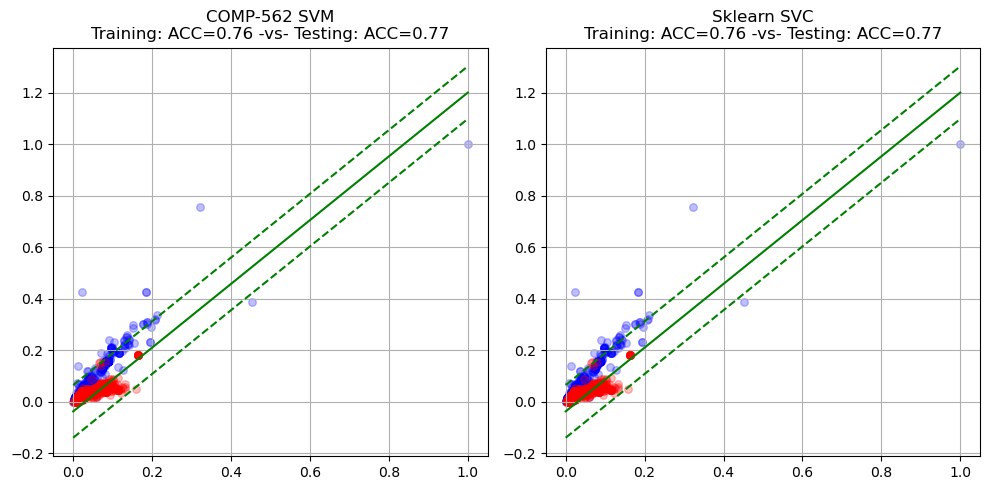

In [164]:
# --------------------------------------
# Add your P3 coding solution below.
# --------------------------------------

scaler = MinMaxScaler()
scaled = scaler.fit_transform(new_df[['push', 'pop']].values)

scaled_df = pd.DataFrame(scaled, columns=['push', 'pop'])
scaled_df['class'] = new_df['class'].values

x = scaled_df[['push', 'pop']].values
y = scaled_df['class'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

C = 0.5

# COMP-562 Gradient Descent SVC

def obj_func(theta, x, y):
    w = theta[:-1]
    b = theta[-1]

    slack_vars = np.maximum(0, 1 - y * (np.dot(x, w) + b))
    return 0.5 * np.dot(w, w) + C * np.sum(slack_vars ** 2)

def grad(theta, x, y):
    w = theta[:-1]
    b = theta[-1]
    slack = 1 - y * (np.dot(x, w) + b)
    active = slack > 0
    
    w_grad = w - 2 * C *(np.dot((y[active] * slack[active]), x[active]))
    b_grad = 0 - 2 * C * np.sum(y[active] * slack[active])
    return np.append(w_grad, b_grad)

guess = np.zeros(3)
result = minimize(obj_func, guess, args=(x_train, y_train), method='L-BFGS-B', jac=grad)

theta = result.x
w = theta[:-1]
b = theta[-1]

y_train_pred_gd = np.sign(np.dot(x_train, w) + b)
y_test_pred_gd = np.sign(np.dot(x_test, w) + b)

train_acc_gd = acc(y_train, y_train_pred_gd)
test_acc_gd = acc(y_test, y_test_pred_gd)


# SKLearn LinearSVC

clf = LinearSVC(C = C, max_iter=10000)
clf.fit(x_train, y_train)
y_train_pred_skl = clf.predict(x_train)
y_test_pred_skl = clf.predict(x_test)
train_acc_skl = acc(y_train, y_train_pred_skl)
test_acc_skl = acc(y_test, y_test_pred_skl)


# Plot!

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def plot_svm(axis, w, b, title):
    axis.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], color='blue', s=30, alpha=0.25, label='Lolipop')
    axis.scatter(x_train[y_train==-1, 0], x_train[y_train==-1, 1], color='red', s=30, alpha=0.25, label='Gatak')

    x_vals = np.linspace(x_train[:,0].min(), x_train[:,0].max(), 200)
    y_vals = (-w[0] * x_vals - b) / w[1]
    margin_pos = (-w[0] * x_vals - b + 1) / w[1]
    margin_neg = (-w[0] * x_vals - b - 1) / w[1]

    axis.plot(x_vals, y_vals, color='green')
    axis.plot(x_vals, margin_pos, color='green', linestyle='--')
    axis.plot(x_vals, margin_neg, color='green', linestyle='--')

    axis.set_title(title)
    axis.grid(True)

plot_svm(axes[0], w, b, f"COMP-562 SVM\nTraining: ACC={train_acc_gd:.2f} -vs- Testing: ACC={test_acc_gd:.2f}")

w_skl = clf.coef_[0]
b_skl = clf.intercept_[0]
plot_svm(axes[1], w_skl, b_skl, f"Sklearn SVC\nTraining: ACC={train_acc_skl:.2f} -vs- Testing: ACC={test_acc_skl:.2f}")

plt.tight_layout()
plt.show()











